In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree

from config import DATA_DIR
from sklearn.model_selection import train_test_split

In [10]:
iris_path = os.path.join(DATA_DIR, 'iris/iris.data')
columns = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "class"]

iris_df = pd.read_csv(iris_path,header=None,names=columns)
print(iris_df.head())
iris_df.info()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non

In [11]:
X = iris_df.iloc[:, 0:4]
y = iris_df.iloc[:, 4]

print(X.shape, y.shape)
print(type(X), type(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

(150, 4) (150,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [12]:
print(type(X_train), type(X_test), type(y_train), type(y_test))


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [13]:
clf = DecisionTreeClassifier(max_depth=15, random_state=7)
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=15, random_state=7)
#clf_ = DecisionTreeClassifier(max_depth=15, random_state=7)
clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=15, random_state=7)

clf = clf.fit(X_train, y_train)
clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=7)

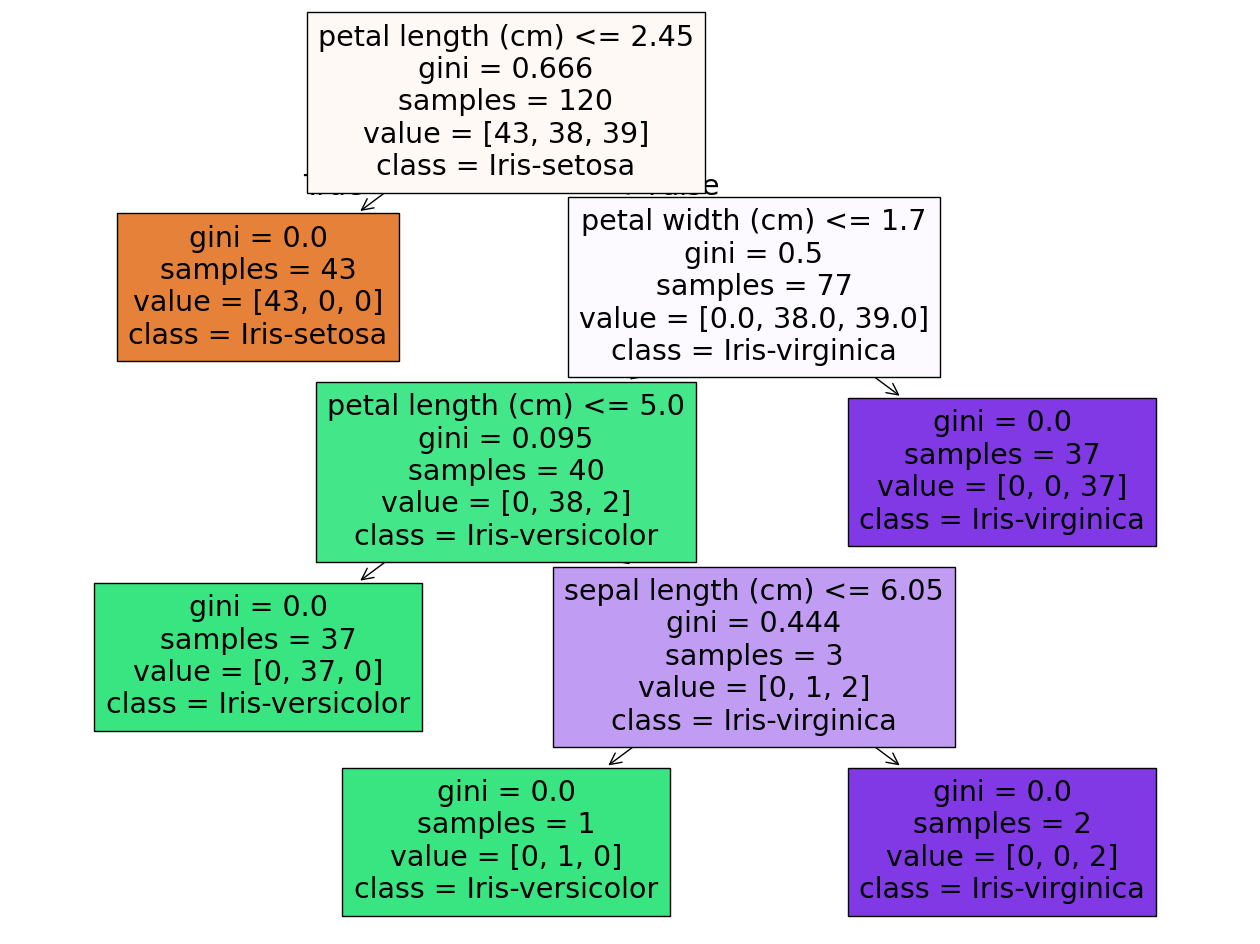

In [14]:
plt.figure(figsize=(16,12))

plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()

In [15]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
y_pred = clf_gini.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
y_pred = clf_entropy.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9
0.9
0.9


| **算法**   | **分裂准则**       | **优点**                                     | **缺点**                        |
|------------|--------------------|---------------------------------------------|----------------------------------|
| **CART**   | 基尼指数           | 适合分类和回归任务，决策边界相对平滑            | 可能过拟合                      |
| **ID3**    | 信息增益           | 偏向多特征，决策边界复杂度高，适合小数据集或特征较少 | 对多值特征偏向严重              |
| **C4.5**   | 信息增益比          | 改进了多值特征偏向问题，支持连续特征分类         | 计算难度较高，现代工具支持较少   |
